DESCRIPTIVE AND INFERENTIAL STATISTIC

Langkah pertama adalah dengan dengan membaca data csv dengan terlebih dahulu mengimport semua packages yang diperlukan

In [2]:
# import semua packages yang diperlukan
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [3]:
# membaca file csv menggunakan pandas
data = pd.read_csv("nyc_rolling_sales.csv")

print("Data read into a pandas dataframe!")

Data read into a pandas dataframe!


Untuk melihat ukuran data, gunakan shape

In [4]:
data.shape

(84548, 22)

Kemudian tampilkan data bagian head

In [5]:
# Menampilkan dataframe bagian head
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Hapus kolom yang tidak digunakan. Kolom Unnamed perlu dihapus karena tidak digunakan dalam analisis. 

In [6]:
# remove columns Unnaamed
data.drop(["Unnamed: 0"], axis=1, inplace=True)

Cek tipe data setiap kolom

In [7]:
# Menampilkan dataframe bagian head
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT NUMBER                84548 non-null  object
 10  ZIP CODE                        84548 non-null  int64 
 11  RESIDENTIAL UNITS               84548 non-null  int64 
 12  COMMERCIAL UNITS                84548 non-null

Selanjutnya ubah tipe data yang tidak sesuai. 

In [8]:
# mengubah tipe data SALE PRICE menjadi integer
data[['SALE PRICE']] = data[['SALE PRICE']].replace({' -  ':'0'})
data[['SALE PRICE']] = data[['SALE PRICE']].astype('float64')
data[['SALE PRICE']] = data[['SALE PRICE']].astype('int64')

In [9]:
# mengubah tipe data TOTAL UNITS menjadi integer
data['TOTAL UNITS'] = data['TOTAL UNITS'].astype('int64')

In [10]:
# mengubah kolom tanggal penjualan menjadi tipe date time
data['tanggal_penjualan']=pd.to_datetime(data['SALE DATE'])
data['tanggal_penjualan']

0       2017-07-19
1       2016-12-14
2       2016-12-09
3       2016-09-23
4       2016-11-17
           ...    
84543   2016-11-28
84544   2017-04-21
84545   2017-07-05
84546   2016-12-21
84547   2016-10-27
Name: tanggal_penjualan, Length: 84548, dtype: datetime64[ns]

Selanjutnya, cek missing value

In [11]:
# mengecek missing values
data.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
tanggal_penjualan                 0
dtype: int64

Selanjutnya adalah melakukan analisis berikut ini:
A. Measure of central tendency: mean, median, modus
B. Measure of spread: range, variance, standar deviation
C. Probability distribution
D. Confidence interval
E. Hypothesis testing

A. MEASURE OF CENTRAL TENDENCY

1. Mean

a. Berapa mean penjualan total unit per bulan?

Langkah pertama adalah ubah kolom tanggal penjualan menjadi tipe data date time

In [12]:
# mengubah kolom tanggal penjualan menjadi tipe date time
data['tanggal_penjualan']=pd.to_datetime(data['SALE DATE'])
data['tanggal_penjualan']

0       2017-07-19
1       2016-12-14
2       2016-12-09
3       2016-09-23
4       2016-11-17
           ...    
84543   2016-11-28
84544   2017-04-21
84545   2017-07-05
84546   2016-12-21
84547   2016-10-27
Name: tanggal_penjualan, Length: 84548, dtype: datetime64[ns]

Kemudian, ekstrak bulan dari kolom sale date

In [13]:
# mengekstrak bulan dari kolom sale date
data['bulan_penjualan']=data['tanggal_penjualan'].dt.month
data['bulan_penjualan']

0         7
1        12
2        12
3         9
4        11
         ..
84543    11
84544     4
84545     7
84546    12
84547    10
Name: bulan_penjualan, Length: 84548, dtype: int32

Selanjutnya kategorikan jumlah total unit yang terjual setiap bulan

In [14]:
# mengkategorikan jumlah total unit penjualan berdasarkan bulan penjualan
group_data=data.groupby('bulan_penjualan')['TOTAL UNITS'].sum()
group_data

bulan_penjualan
1     13291
2     12033
3     14300
4     13036
5     17583
6     19784
7     15038
8      9764
9     20549
10    16068
11    17673
12    21045
Name: TOTAL UNITS, dtype: int64

Selanjutnya, hitung mean menggunakan pandas, numpy, atau scipy

In [15]:
# menghitung rata-rata menggunakan pandas
group_data_mean_np=np.mean(group_data)
# menghitung mean menggunakan numpy
group_data_mean_pd=pd.Series(group_data).mean()
# menghitung mean menggunakan scipy
group_data_mean_sp=statistics.mean(group_data)
group_data_mean_np, group_data_mean_pd, group_data_mean_sp

(15847.0, 15847.0, 15847)

Berdasarkan perhitungan diatas, rata-rata penjualan total unit per bulan adalah sebesar 15.847 unit. 

b. Berapa mean penjualan tiap kategori unit (residensial dan komersial) setiap bulan?

Pertama-tama, kategorikan jumlah penjualan unit residensial dan komersial setiap bulan

In [16]:
# mengkategorikan jumlah penjualan residential unit penjualan berdasarkan bulan penjualan
group_data_r=data.groupby('bulan_penjualan')['RESIDENTIAL UNITS'].sum()

# mengkategorikan jumlah commercial unit penjualan berdasarkan bulan penjualan
group_data_c=data.groupby('bulan_penjualan')['COMMERCIAL UNITS'].sum()

# menampilkan data
group_data_r, group_data_c

(bulan_penjualan
 1     11399
 2     10924
 3     12551
 4     12120
 5     16732
 6     18677
 7     14062
 8      9021
 9     18109
 10    12923
 11    15459
 12    19255
 Name: RESIDENTIAL UNITS, dtype: int64,
 bulan_penjualan
 1     1642
 2      957
 3     1458
 4      721
 5      669
 6      906
 7      817
 8      625
 9     2146
 10    2955
 11    1962
 12    1507
 Name: COMMERCIAL UNITS, dtype: int64)

Kemudian hitung mean menggunakan pandas, numpy, atau scipy

In [75]:
# menghitung mean menggunakan pandas
group_data_r_mean_np=np.mean(group_data_r)
# menghitung mean menggunakan numpy
group_data_r_mean_pd=pd.Series(group_data_r).mean()
# menghitung mean menggunakan scipy
group_data_r_mean_sp=statistics.mean(group_data_r)
# menampilkan hasil
group_data_r_mean_np, group_data_r_mean_pd, group_data_r_mean_sp

(14269.333333333334, 14269.333333333334, 14269.333333333334)

Mean penjualan unit residensial tiap bulan adalah 14269 unit

In [72]:
# menghitung mean menggunakan pandas
group_data_c_mean_np=np.mean(group_data_c)
group_data_c_mean_np

1363.75

In [73]:
# menghitung mean menggunakan numpy
group_data_c_mean_pd=pd.Series(group_data_c).mean()
group_data_c_mean_pd

1363.75

In [18]:
# menghitung mean menggunakan scipy
group_data_c_mean_sp=statistics.mean(group_data_c)
group_data_c_mean_sp

1363.75

Mean penjualan komersial unit setiap bulan adalah 1364 unit

d. Berapa mean total unit yang terjual setiap penjualan

In [76]:
total_units=data['TOTAL UNITS']
# menghitung mean menggunakan pandas
total_units_mean_np=np.mean(total_units)
# menghitung mean menggunakan numpy
total_units_mean_pd=pd.Series(total_units).mean()
# menghitung mean menggunakan scipy
total_units_mean_sp=statistics.mean(total_units)
# menampilkan hasill
total_units_mean_np, total_units_mean_pd, total_units_mean_sp

(2.249183895538629, 2.249183895538629, 2.249183895538629)

Mean total unit yang terjual dalam setiap penjualan adalah sebesar 2.25 atau dibulatkan menjadi 2 unit. 

2. Median

Median dapat dihitung menggunakan numpy, scipy, atau pandas. 

a. Berapa median penjualan total unit per bulan?

In [79]:
# menghitung modus menggunakan scipy
group_data_modus_sp=statistics.mode(group_data)
group_data_modus_sp

13291

Median total unit penjualan per bulan adalah 13291 unit

b. Berapa median penjualan tiap kategori unit (residensial dan komersial) setiap bulan?

In [80]:
# menghitung modus menggunakan scipy
group_data_r_modus_sp=statistics.mode(group_data_r)
group_data_r_modus_sp

11399

Median penjualan unit residensial per bulan adalah 11399 unit

In [81]:
# menghitung modus menggunakan scipy
group_data_c_modus_sp=statistics.mode(group_data_c)
group_data_c_modus_sp

1642

Median penjualan unit komersial per bulan adalah 11399 unit

c. Median total unit yang penjualan setiap penjualan

3. Modus

a. Berdasarkan data tiap penjualan, building class at present dan building class at time of sale jenis apa yang sering kali terjual? 

In [84]:
bc_present=data['BUILDING CLASS AT PRESENT']
# menghitung modus menggunakan scipy
bc_present_modus_sp=statistics.mode(bc_present)
bc_present_modus_sp

'D4'

Building class at time of sale yang sering terjual dalam setiap penjualan adalah tipe D4

In [85]:
bc_sale=data['BUILDING CLASS AT TIME OF SALE']
# menghitung modus menggunakan scipy
bc_sale_modus_sp=statistics.mode(bc_sale)
bc_sale_modus_sp

'R4'

Building class at time of sale yang sering terjual dalam setiap penjualan adalah tipe R4

b. Berdasarkan data tiap penjualan, tax class at present dan tax class at time of sale jenis apa yang sering kali terjual? 

In [25]:
tax_present=data['TAX CLASS AT PRESENT']
# menghitung modus menggunakan scipy
tax_present_modus_sp=statistics.mode(tax_present)
tax_present_modus_sp

'1'

In [86]:
tax_sale=data['TAX CLASS AT TIME OF SALE']
# menghitung modus menggunakan scipy
tax_sale_modus_sp=statistics.mode(tax_sale)
tax_sale_modus_sp

1

Tax class at present dan tax class time of sale yang sering dikenai bangunan adalah jenis pajak 1.

B. MEASURE OF SPREAD

1. Range

a. Berapa range total unit penjualan tiap bulan?

Range dapat dihitung menggunakan pandas, numpy, atau scipy

In [89]:
# menghitung range menggunakan pandas
group_data_range_np=np.ptp(group_data)
# menghitung range menggunakan numpy
group_data_range_pd=pd.Series(group_data).max()-pd.Series(group_data).min()
group_data_range_np, group_data_range_pd

(11281, 11281)

In [90]:
# menentukan nilai tertinggi dan terendah
group_data_max=pd.Series(group_data).max()
group_data_min=pd.Series(group_data).min()
group_data_max, group_data_min


(21045, 9764)

Range total unit penjualan tiap bulan adalah 4973,5 dengan nilai tertinggi 21045 dan nilai terendah 9764

b. Berapa range penjualan unit residensial tiap bulan?

In [91]:
# menghitung range menggunakan pandas
group_data_r_range_np=np.ptp(group_data_r)
# menghitung range menggunakan numpy
group_data_r_range_pd=pd.Series(group_data_r).max()-pd.Series(group_data_r).min()
# menampilkan hasil
group_data_r_range_np, group_data_r_range_pd

(10234, 10234)

In [92]:
# menentukan nilai tertinggi dan terendah
group_data_r_max=pd.Series(group_data_r).max()
group_data_r_min=pd.Series(group_data_r).min()
group_data_r_max, group_data_r_min

(19255, 9021)

Range penjualan unit residensial tiap bulan adalah 5136.5 dengan nilai tertinggi 19255 dan nilai terendah 9021

c. Berapa range penjualan unit komersial tiap bulan?

In [98]:
# menghitung range menggunakan pandas
group_data_c_range_np=np.ptp(group_data_c)
# menghitung range menggunakan numpy
group_data_c_range_pd=pd.Series(group_data_c).max()-pd.Series(group_data_c).min()
# menampilkan hasil
group_data_c_range_np, group_data_c_range_pd

(2330, 2330)

In [99]:
# menentukan nilai tertinggi dan terendah
group_data_c_max=pd.Series(group_data_c).max()
group_data_c_min=pd.Series(group_data_c).min()
group_data_c_max, group_data_c_min

(2955, 625)

Range penjualan unit residensial tiap bulan adalah 929 dengan nilai tertinggi 2955 dan nilai terendah 625

2. Variation

a. Berapa variasi total unit penjualan tiap bulan?

In [101]:
# menghitung variance menggunakan pandas
group_data_var_pd=pd.Series(group_data).var()
# menghitung variance menggunakan scipy
group_data_var_sp=statistics.variance(group_data)
# menampilkan hasil
group_data_var_pd, group_data_var_sp

(12732438.363636363, 12732438.363636363)

Variasi total unit setiap penjualan adalah sebesar 12732438.36

b. Berapa variasi total unit residensial dan komersial tiap bulan?

In [102]:
# menghitung variance menggunakan pandas
group_data_var_r_pd=pd.Series(group_data_r).var()
# menghitung variance menggunakan scipy
group_data_var_r_sp=statistics.variance(group_data_r)
# menampilkan hasil
group_data_var_r_pd, group_data_var_r_sp

(11173676.96969697, 11173676.969696969)

Variasi penjualan unit residensial tiap bulan adalah sebesar 11173676.97

In [106]:
# menghitung variance menggunakan scipy
group_data_var_c_sp=statistics.variance(group_data_c)
group_data_var_c_sp

520381.29545454547

Variasi penjualan unit komersial tiap bulan adalah sebesar 520381.30

c. Berapa variasi total unit setiap penjualan?

In [107]:
# menghitung variance menggunakan numpy
total_units_var_np=np.var(total_units)
# menghitung variance menggunakan pandas
total_units_var_pd=pd.Series(total_units).var()
# menghitung variance menggunakan scipy
total_units_var_sp=statistics.variance(total_units)
total_units_var_np, total_units_var_pd, total_units_var_sp

(359.9547025794672, 359.958960030383, 359.958960030383)

Variasi total unit setiap penjualan adalah sebesar 359.96

3. Standar Deviation

In [38]:
import numpy as np
from scipy import stats

a. Berapa standar deviasi total unit penjualan tiap bulan?

In [39]:
# menghitung std menggunakan pandas
group_data_std_pd=np.std(group_data)
# menghitung std menggunakan numpy
group_data_std_np=np.std(group_data)
# menghitung std menggunakan scipy

group_data_std_pd, group_data_std_np

(3416.3433424252507, 3416.3433424252507)

Standar deviasi total unit penjualan tiap bulan adalah sebesar 3416.34

b. Berapa standar deviasi penjualan unit residensial dan komersial tiap bulan?

In [40]:
# menghitung std menggunakan pandas
group_data_r_std_pd=np.std(group_data_r)
# menghitung std menggunakan numpy
group_data_r_std_np=np.std(group_data_r)
# menghitung std menggunakan scipy

group_data_r_std_pd, group_data_r_std_np

(3200.3964164181634, 3200.3964164181634)

Standar deviasi penjualan unit residensial tiap bulan adalah sebesar 3200.39

In [41]:
# menghitung std menggunakan pandas
group_data_c_std_pd=np.std(group_data_c)
# menghitung std menggunakan numpy
group_data_c_std_np=np.std(group_data_c)
# menghitung std menggunakan scipy

group_data_c_std_pd, group_data_c_std_np

(690.6635848949907, 690.6635848949907)

Standar deviasi penjualan unit komersial tiap bulan adalah sebesar 690.66

c. Berapa standar deviasi total unit penjualan dalam setiap penjualan?

In [42]:
# menghitung std menggunakan pandas
total_units_std_pd=np.std(total_units)
# menghitung std menggunakan numpy
total_units_std_np=np.std(total_units)
# menghitung std menggunakan scipy

total_units_std_pd, total_units_std_np

(18.972472231616713, 18.972472231616713)

Standar deviasi total unit penjualan dalam setiap penjualan adalah 18.97

C. PROBABILITY DISTRIBUTION

Bagaimana distribusi poisson untuk total unit penjualan tiap penjualan?

Langkah pertama yaitu import poisson

In [43]:
# import poisson
from scipy.stats import poisson

mu menunjukkan mean yang telah dihitung sebelumnya dan size menunjukkan banyaknya angka acak

In [44]:
# jumlah total penjualan dalam sebulan
total_units_poisson=poisson.rvs(mu=2.25, size=84547)

# menampilkan total unit penjualan per bulan
print('Data total penjualan unit')
print(total_units_poisson)

Data total penjualan unit
[0 4 0 ... 6 3 1]


Kemudian visualisasikan data. Import seaborn dan matplotlib.pyplot

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

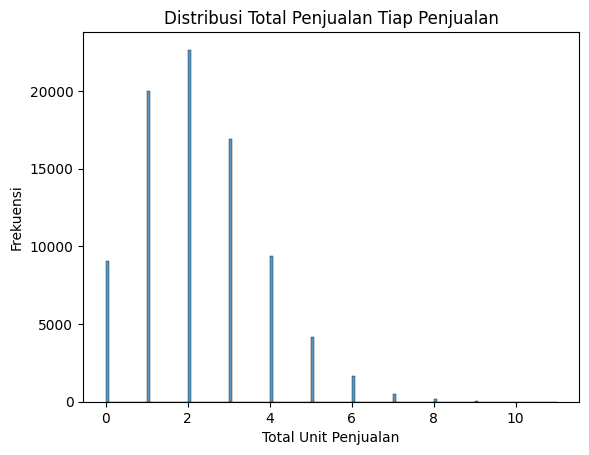

In [46]:
# Visualisasi data total unit penjualan per bulan  menggunakan seaborn
sns.histplot(total_units_poisson, kde=False)
plt.xlabel('Total Unit Penjualan')
plt.ylabel('Frekuensi')
plt.title('Distribusi Total Penjualan Tiap Penjualan')
plt.show()

Distribusi total penjualan tiap penjualan menjulur ke kanan yang menunjukkan bahwa lebih banyak total unit penjualan tiap penjualan yang memiliki nilai lebih tinggi dari rata-rata unit terjual dalam setiap penjualan

D. CONFIDENCE INTERVAL

1. Berapa confidence interval (CI) unit residensial dan komersial dari jumlah total unit yang terjual tiap bulan?

Langkah pertama yaitu menghitung jumlah total unit residensial  dan komersial yang terjual

In [47]:
# jumlah unit total residensial
tot_res=group_data_r.sum()
# jumlah unit total komersial
tot_com=group_data_c.sum()
# menampilkan hasil total
tot_res, tot_com

(171232, 16365)

Jumlah total unit residensial dan komersial yang terjual masing-masing adlah 171232 dan 16365 unit

Selanjutnya, hitung proporsi residential units yang  terjual terhadap total units yang terjual per bulan

In [48]:
# jumlah total unit
tot_units=total_units.sum()
tot_units

190164

Jumlah total unit yang terjual adalah 1901164

Kemudian, cari proporsi residensial dan komersial unit terhadap total unit

In [49]:
# proporsi unit residensial terhadap total unit
p_res=tot_res/tot_units
# proporsi unit komersial terhadap total unit
p_com=tot_com/tot_units

# menampilkan proporsi
p_res, p_com

(0.900443827433163, 0.08605729791127659)

Proporsi unit residensial sebesar 0.90 dan unit komersial sebesar 0.09

Selanjutnya, tentukan standar error (SE) proporsi residensial dan komersial unit

In [50]:
# SE proporsi unit residensial 
se_res=np.sqrt(p_res*(1-p_res)/tot_units)
# SE proporsi unit kkomersial 
se_com=np.sqrt(p_com*(1-p_com)/tot_units)
# menampilkan hasil
se_res, se_com

(0.0006865912376070164, 0.0006431158090221504)

SE dari perhitungan proporsi unit residensial adalah sebesar 0.0007 dan SE dari perhitungan proporsi unit komersial adalah 0.0009. Berdasarkan SE yang didapatkan, maka dapat disimpulkan bahwa perhitungan kedua proporsi tersebut akurat dengan standar kesalahan yang sangat rendah.

Langkah berikutnya adalah membuat CI 95% sehingga dengan nilai z-score 1.96

In [51]:
# CI unit residensial
z_score = 1.96
lcb_res=p_res-z_score*se_res # lower limit of CI
ucb_res=p_res+z_score*se_res # upper limit of CI
lcb_res,ucb_res

(0.8990981086074532, 0.9017895462588728)

Dengan tingkat kepercayaan 5%, proporsi unit residensial yang terjual adalah antara 0,899 - 0,902

In [108]:
# CI unit komersial
z_score = 1.96
lcb_com=p_com-z_score*se_com # lower limit of CI
ucb_com=p_com+z_score*se_com # upper limit of CI
lcb_com,ucb_com

(0.08479679092559317, 0.08731780489696)

Dengan tingkat kepercayaan 5%, proporsi unit komersial yang terjual adalah antara 0,085 - 0,087

2. CI rata-rata unit residensial dan komersial yang terjual tiap bulan

Data yang dibutuhkan adalah data rata-rata dan standar deviasi residential units dan commercial units yang terjual per bulan, serta jumlah total unit residential dan commercial yang terjual

In [53]:
# rata-rata residential dan commercial unit yang terjual
mean_res=group_data_r_mean_np
mean_com=group_data_c_mean_np

# total units
tot_units

# menghitung standar deviasi residential dan commercial units yang terjual
sd_res=np.std(group_data_r)
sd_com=np.std(group_data_c)

# z-score dengan CI 95%
z_score=1.96

mean_res, mean_com, sd_res, sd_com, z_score, tot_units

(14269.333333333334,
 1363.75,
 3200.3964164181634,
 690.6635848949907,
 1.96,
 190164)

Mean unit residensial, mean unit komersial masing-masing sebesar 14269.33 dan 1363.75
Standar deviasi unit residensial dan komersial masin-masing adalah 3200.40 dan 690.66
Z-score=1.96 
Total unit 190.164

Menghitung standar eror menggunakan formula standar error mean

In [54]:
# SE mean residensial
se_mean_res=sd_res/np.sqrt(tot_units)
# SE mean komersial
se_mean_com=sd_com/np.sqrt(tot_units)
# menampilkan hasil
se_mean_res, se_mean_com

(7.339046230837875, 1.5838075413087407)

SE mean dari residensial unit yang terjual tiap bulan dan SE mean dari komersial unit yang terjual tiap bulan adalah 7.34 dan 1.58 

Menghitung CI penjualan unit residensial dan komersial tiap bulan

In [55]:
# CI residensial
lcb_res = mean_res - z_score* se_mean_res #lower limit of the CI
ucb_res = mean_res + z_score* se_mean_res  #upper limit of the CI
lcb_res, ucb_res

(14254.948802720892, 14283.717863945776)

Artinya, dengan tingkat kepercayaan 5% mean dari total unit residensial yang terjual adalah antara 14254,95 - 14283,72 unit per bulan

In [56]:
# CI komersial
lcb_com = mean_com - z_score* se_mean_com #lower limit of the CI
ucb_com = mean_com + z_score* se_mean_com  #upper limit of the CI
lcb_com, ucb_com

(1360.6457372190348, 1366.8542627809652)

Artinya, dengan confidence interval 5%, mean dari total unit commercial yang terjual adalah antara 1360,64 - 1366,85 unit per bulan 

E. Hypothesis Testing

Apakah ada korelasi antara tax class at present (jenis pajak saat ini) dengan tax class at time of sale (jenis pajak saat penjualan) 

Uji chi square dilakukan dengan menggunakan tingkat kepercayaan 5% (alfa 0.05)

Hipotesis Nol (H0): Tidak ada hubungan antara jenis pajak saat ini dan jenis pajak saat penjualan
Hipotesis Alternatif (H1): Ada hubungan antara jenis pajak saat ini dan jenis pajak saat penjualan

Langkah pertama adalah menampilkan kolom yang diperlukan

In [57]:
dtt=data[['TAX CLASS AT PRESENT', 'TAX CLASS AT TIME OF SALE']]
dtt

,TAX CLASS AT PRESENT,TAX CLASS AT TIME OF SALE
0,2A,2
1,2,2
2,2,2
3,2B,2
4,2A,2
...,...,...
84543,1,1
84544,1,1
84545,1,1
84546,4,4


Kemudian import semua packages yang diperlukan

In [58]:
import pandas as pd
from scipy.stats import chi2_contingency

In [59]:
# Menghitung uji chi-square
chi2, p_value, dof, expected = chi2_contingency(pd.crosstab(data['TAX CLASS AT PRESENT'], data['TAX CLASS AT TIME OF SALE']))

# Menampilkan hasil uji chi-square
print("Chi-square:", chi2)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)

Chi-square: 251227.80116687308
P-value: 0.0
Degrees of Freedom: 30


P-value < 0.05 sehingga terima H0. Ini berarti terdapat hubungan yang signifikan antara jenis pajak saat ini dengan tjenis pajak sat penjualan dengan derajat bebas sebesar 30 dan nilai chi-square 251227.80

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  int64         
 1   NEIGHBORHOOD                    84548 non-null  object        
 2   BUILDING CLASS CATEGORY         84548 non-null  object        
 3   TAX CLASS AT PRESENT            84548 non-null  object        
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       84548 non-null  object        
 7   BUILDING CLASS AT PRESENT       84548 non-null  object        
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                84548 non-null  object        
 10  ZIP CODE                        84548 non-null  int64         
 11  RE

Apakah ada keterkaitan antara tax class at time of sale dengan building class at time of sale

In [61]:
dtbc=data[['TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE']]
dtbc

,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE
0,2,C2
1,2,C7
2,2,C7
3,2,C4
4,2,C2
...,...,...
84543,1,B9
84544,1,B9
84545,1,B2
84546,4,K6


KESIMPULAN AKHIR SEMUA ANALISIS

- Mean penjualan total unit per bulan adalah sebesar 15.847 unit dengan mean penjualan unit residensial sebesar 14269 unit dan unit komersial sebesar 1364 unit. Mean total unit tiap penjualan adalah 2 unit.
- Median penjualan total unit per bulan adalah sebesar 13291 unit dengan median dari penjualan unit residensial setiap bulan  adalah 1399 dan median dari penjualan unit komersial setiap bulan adalah 1642 unit. 
- Modus dari kelas bangunan saat ini (building class at present) adalah jenis D4 sedangkan modus kelas bangunan saat dijual adalah R4. Modus kelas pajak saat ini (tax class at present) dan saat penjualan (tax class at time of sale) adalah sama yaitu kelas 1.
- Range total penjualan unit tiap bulan adalah 11281 dengan total penjualan tertinggi per bulan adalah 21045 unit dan total penjualan terendah tiap bulan ebesar 9764 unit. Range penjualan unit residensial setiap bulan adalah 10234 dengan jumlah tertinggi penjualan unit residensial perbulan adalah 19255 dan penjualan terendah 9021 unit. Range penjualan unit komersial tiap bulan adalah 2330 dengan jumlah penjualan unit komersial tertinggi 2955 dan terendah 625.
- Variasi total unit penjualan adalah sebesar 112732438.36 dengan variasi penjualan unit residensial tiap bulan adalah sebesar 11173676.97 dan unit komersial sebesar 520381.30. Variasi total unit setiap penjualan sebesar 359.96.
- Standar deviasi total unit penjualan tiap bulan adalah 3416.34 dengan standar deviasi penjualan unit residensial tiap bulan 3200.39 dana unit komersial sebesar 690.66. Standar deviasi total unit penjualan dalam setiap penjualan adalah 18.97. 
- Distribusi total penjualan tiap penjualan menjulur ke kanan yang menunjukkan bahwa lebih banyak total unit penjualan tiap penjualan yang memiliki nilai lebih tinggi dari rata-rata unit terjual dalam setiap penjualan. 
- Tingkat kepercayaan 5%, proporsi unit residensial yang terjual adalah antara 0,899 - 0,902 dan cproporsi unit komersial yang terjual adalah antara 0,085 - 0,087. Proporsi unit residensial dan komersial tersebut menghasilkan nilai SE sebesar 0.0009 dab 0.0006 yang menunjukkan perhitungan tersebut akurat, dan kesalahan error yang terjadi sangat kecil. Hasil perhitungan CI menunjukkan bahwa dengan tingkat kepercayaan 5% mean dari total unit residensial yang terjual adalah antara 14254,95 - 14283,72 unit per bulan dan mean total unit komersial sebesar 1360,64 - 1366,85 unit per bulan. SE mean rata-rata unit residensial dan komersial yang terjual per bulan sebesar 7.34 dan 1.58 yang menunjukkan bahwa perhitungan mean raata-rata yang dihasilkan tersebut cukup akurat. 
- Terdapat hubungan yang signifikan antara tax class at present (jenis pajak saat ini) dengan tax class at time of sale (jenis pajak saat penjualan) dengan P-value sebesar 0.0 